# Creating the xG graph for Brighton vs Manchester United 2023-24

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Getting the match ID and deducing the url
base_url = "https://understat.com/match/"
match = str(input("Enter the match ID: "))
url = base_url + match
url

Enter the match ID:  22267


'https://understat.com/match/22267'

## Scraping the data from Understat

In [4]:
# Scraping the resources from the url
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
scripts = soup.find_all('script')

In [5]:
strings = scripts[1].string
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22582128\\x22,\\x22minute\\x22\\x3A\\x224\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.960999984741211\\x22,\\x22Y\\x22\\x3A\\x220.40299999237060546\\x22,\\x22xG\\x22\\x3A\\x220.018925296142697334\\x22,\\x22player\\x22\\x3A\\x22Adam\\x20Webster\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x227699\\x22,\\x22situation\\x22\\x3A\\x22FromCorner\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2222267\\x22,\\x22h_team\\x22\\x3A\\x22Brighton\\x22,\\x22a_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222024\\x2D05\\x2D19\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Pascal\\x20Gro\\x5Cu00df\\x22,\\x22lastAction\\x22\\x3A\\x22Aerial\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22582130\\x22,\\x22minute\\x22\\x3A\\x2211\\

In [6]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# convert to json format
data = json.loads(json_data)

In [7]:
data

{'h': [{'id': '582128',
   'minute': '4',
   'result': 'MissedShots',
   'X': '0.960999984741211',
   'Y': '0.40299999237060546',
   'xG': '0.018925296142697334',
   'player': 'Adam Webster',
   'h_a': 'h',
   'player_id': '7699',
   'situation': 'FromCorner',
   'season': '2023',
   'shotType': 'Head',
   'match_id': '22267',
   'h_team': 'Brighton',
   'a_team': 'Manchester United',
   'h_goals': '0',
   'a_goals': '2',
   'date': '2024-05-19 15:00:00',
   'player_assisted': 'Pascal Groß',
   'lastAction': 'Aerial'},
  {'id': '582130',
   'minute': '11',
   'result': 'SavedShot',
   'X': '0.9069999694824219',
   'Y': '0.6569999694824219',
   'xG': '0.27490857243537903',
   'player': 'Valentín Barco',
   'h_a': 'h',
   'player_id': '12498',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'LeftFoot',
   'match_id': '22267',
   'h_team': 'Brighton',
   'a_team': 'Manchester United',
   'h_goals': '0',
   'a_goals': '2',
   'date': '2024-05-19 15:00:00',
   'player_assist

## Creating the dataframes with the required dataframes

In [8]:
# Creating different json data for home and away teams
home_team_data = data['h']
away_team_data = data['a']
home_team = home_team_data[0]['h_team']
away_team = away_team_data[0]['a_team']

In [9]:
# Creating the necessary columns for the final dataframe
minute = []
player = []
xG = []
result = []
team = []

# Appending the values to the respective columns
for index in range(len(home_team_data)):
    for key in home_team_data[index]:
        if key == 'minute':
            minute.append(home_team_data[index][key])
        if key == 'player':
            player.append(home_team_data[index][key])
        if key == 'h_team':
            team.append(home_team_data[index][key])
        if key == 'xG':
            xG.append(home_team_data[index][key])
        if key == 'result':
            result.append(home_team_data[index][key])

for index in range(len(away_team_data)):
    for key in away_team_data[index]:
        if key == 'minute':
            minute.append(away_team_data[index][key])
        if key == 'player':
            player.append(away_team_data[index][key])
        if key == 'a_team':
            team.append(away_team_data[index][key])
        if key == 'xG':
            xG.append(away_team_data[index][key])
        if key == 'result':
            result.append(away_team_data[index][key])

In [10]:
# Creating the dataframe
col_names = ['minute','xG','team','player','result']
df = pd.DataFrame([minute,xG,team,player,result],index=col_names)
df = df.T

In [11]:
df

,minute,xG,team,player,result
0,4,0.018925296142697334,Brighton,Adam Webster,MissedShots
1,11,0.27490857243537903,Brighton,Valentín Barco,SavedShot
2,17,0.0625562071800232,Brighton,Jakub Moder,SavedShot
3,20,0.10473421216011047,Brighton,João Pedro,BlockedShot
4,22,0.03518944978713989,Brighton,Adam Webster,MissedShots
5,27,0.026056284084916115,Brighton,Carlos Baleba,BlockedShot
6,28,0.05778523162007332,Brighton,Adam Webster,BlockedShot
7,31,0.3987084627151489,Brighton,João Pedro,MissedShots
8,34,0.024687567725777626,Brighton,Adam Lallana,BlockedShot
9,36,0.09209132194519043,Brighton,Adam Lallana,BlockedShot


In [12]:
#Cumulative Sum xG home team
home_df = df[df['team'] == home_team]
home_df['minute'] = home_df['minute'].astype('int64')
home_df['xG'] = home_df['xG'].astype('float64')
home_df.sort_values(by='minute', inplace=True)
home_df['home_cum'] = home_df['xG'].cumsum()

#Cumulative Sum xG away team
away_df = df[df['team'] == away_team]
away_df['minute'] = away_df['minute'].astype('int64')
away_df['xG'] = away_df['xG'].astype('float64')
away_df.sort_values(by='minute', inplace=True)
away_df['away_cum'] = away_df['xG'].cumsum()

In [13]:
home_goal = home_df[home_df['result'].str.contains("Goal")]
home_goal["scorechart"] = home_goal["minute"].astype(str) + "'" + " " +home_goal["player"]
away_goal = away_df[away_df['result'].str.contains("Goal")]
away_goal["scorechart"] = away_goal["minute"].astype(str) + "'" + " " +away_goal["player"]

In [14]:
away_goal

,minute,xG,team,player,result,away_cum,scorechart
25,72,0.361599,Manchester United,Diogo Dalot,Goal,0.860828,72' Diogo Dalot
27,87,0.099970,Manchester United,Rasmus Højlund,Goal,1.004036,87' Rasmus Højlund


In [15]:
#Total xG
away_total = round(away_df['xG'].sum(),2).astype(str)
home_total = round(home_df['xG'].sum(),2).astype(str)

## Plotting the xG graph

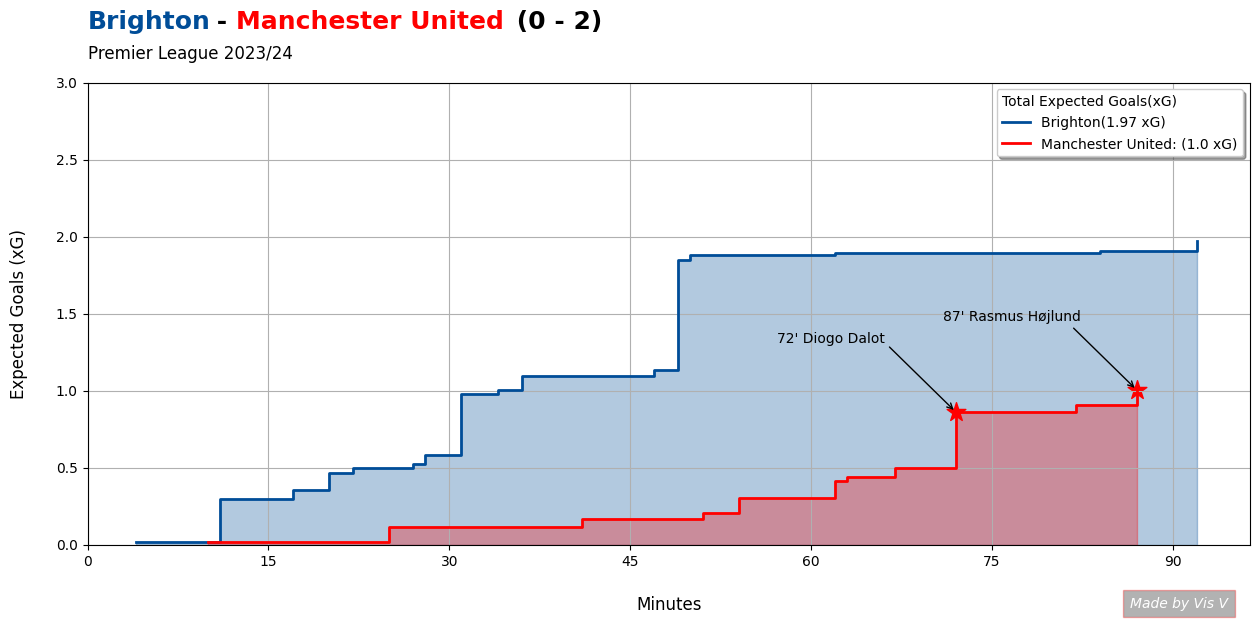

In [53]:
fig, ax = plt.subplots(figsize=(15,6))

# Create line plots
ax.step(x = home_df['minute'], y = home_df['home_cum'], where = 'post', color ='#004d98', label= home_team + "(" + home_total + " xG)"  ,linewidth=2)  
ax.step(x = away_df['minute'], y = away_df['away_cum'], where = 'post', color = 'red', label= away_team + ": " + "(" + away_total + " xG)" ,linewidth=2)

# Fill the area under the home team graph line
ax.fill_between(home_df['minute'], home_df['home_cum'], step='post', color='#004d98', alpha=0.3)

# Fill the area under the away team graph line
ax.fill_between(away_df['minute'], away_df['away_cum'], step='post', color='red', alpha=0.3)

# Create scatter plot for highlighting the goal
ax.scatter(x= home_goal['minute'], y = home_goal['home_cum'] , marker='*', s= 200 ,color = '#004d98')
ax.scatter(x= away_goal['minute'], y = away_goal['away_cum'] , marker='*', s =200, color = 'red')

# Customize our chart
for j, txt in home_goal['scorechart'].items():
    ax.annotate(txt, (home_goal['minute'][j], home_goal['home_cum'][j]),xycoords='data',ha='center',
                xytext=(-90, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'black'))

for i, txt in away_goal['scorechart'].items():
    ax.annotate(txt, (away_goal['minute'][i], away_goal['away_cum'][i]),xycoords='data', ha='center',
                xytext=(-90, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'black'))

# Set axis limits
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.grid()

# Set the title with different colors for home and away teams
fig.text(0.125, 0.97, home_team, fontsize=18, fontweight="bold", color='#004d98')
fig.text(0.125 + 0.01 * len(home_team), 0.97, " - ", fontsize=18, fontweight="bold", color='black')
fig.text(0.125 + 0.0086 * len(home_team) + 0.01 * 3, 0.97, away_team, fontsize=18, fontweight="bold", color='red')
fig.text(0.125 + 0.01 * len(home_team) + 0.01 * 3 + 0.01 * len(away_team), 0.97, f" ({len(home_goal)} - {len(away_goal)})", fontsize=18, fontweight="bold", color='black')
fig.text(s='Premier League 2023/24', x=0.125, y=0.92, fontsize=12)
fig.text(s='Made by Vis V', x=0.82, y=0.005, color = 'white', fontstyle='italic', bbox={
        'boxstyle': 'square,pad=0.5',
        'facecolor': '#000000',
        'edgecolor': 'red',
        'linewidth': 1,
        'alpha': 0.3
    })
legend = ax.legend(title = 'Total Expected Goals(xG)' ,loc='best', shadow=True)
legend._legend_box.align = "left"

plt.ylabel("Expected Goals (xG)", fontsize = 12, labelpad = 20)
plt.xlabel("Minutes", fontsize = 12, labelpad = 20)
plt.show()

In [54]:
fig.savefig('xG Graph.png', facecolor='white', bbox_inches='tight')